In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize

In [53]:
%matplotlib inline

In [54]:
dataset=pd.read_csv("bootcamp.csv")

In [55]:
dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [56]:
#BALANCE   kalan bakiye tutarı
#PURCHASES hesaptan yapılan satın alma tutarı
#ONEOFF_PURCHASES tek seferde yapılan maksimum satın alma tutarı
#INSTALLMENTS_PURCHASES taksitli alışveriş tutarı
#CASH_ADVANCE peşin alışveriş tutarı
#CREDIT_LIMIT kart limiti
#MINIMUM_PAYMENTS kullanıcı tarafında yapılan ödeme miktarı
#MINIMUM_PAYMENTS kullanıcı tarafından yapılan minumum ödeme miktarı
#PRC_FULL_PAYMENT tam ödemenin yüzdesi
#TENURE kredi kartı kullanım süresi
#PURCHASES_TRX yapılan satın alma sayısı

In [57]:
dataset = dataset.drop('CUST_ID' , axis=1)

In [58]:
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [59]:
X = dataset
X = X.dropna()

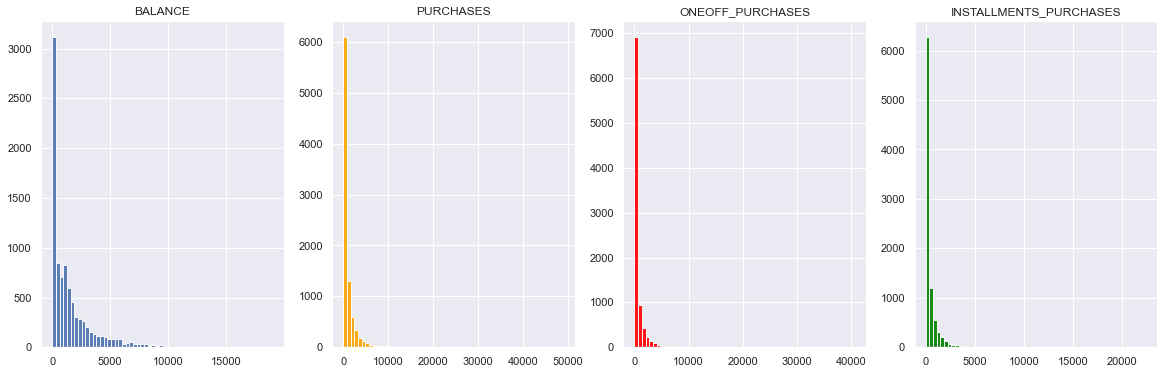

In [60]:
fig, ax = plt.subplots(1,4,figsize =(20,6))
ax0, ax1, ax2, ax3 = ax.flatten()

ax0.hist(dataset['BALANCE'], bins = 60, alpha = 0.9 )
ax1.hist(dataset['PURCHASES'], bins = 60, color="orange" ,alpha =0.9 )
ax2.hist(dataset['ONEOFF_PURCHASES'], bins = 60, color="red",alpha =0.9 )
ax3.hist(dataset['INSTALLMENTS_PURCHASES'], bins = 60, color="green",alpha =0.9 )

ax0.set_title("BALANCE")
ax1.set_title("PURCHASES")
ax2.set_title("ONEOFF_PURCHASES")
ax3.set_title("INSTALLMENTS_PURCHASES")



plt.show()

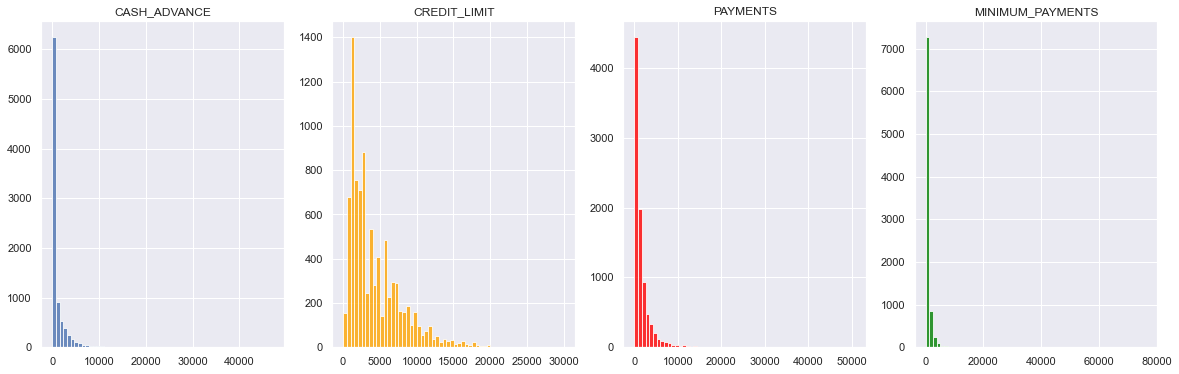

In [62]:
fig, ax = plt.subplots(1,4,figsize =(20,6))
ax4, ax5, ax6, ax7 = ax.flatten()
ax4.hist(dataset['CASH_ADVANCE'], bins = 60, alpha =0.8 )
ax5.hist(dataset['CREDIT_LIMIT'], bins = 60, color="orange" ,alpha =0.8 )
ax6.hist(dataset['PAYMENTS'], bins = 60, color="red",alpha =0.8 )
ax7.hist(dataset['MINIMUM_PAYMENTS'], bins = 60, color="green",alpha =0.8 )
ax4.set_title("CASH_ADVANCE")
ax5.set_title("CREDIT_LIMIT")
ax6.set_title("PAYMENTS")
ax7.set_title("MINIMUM_PAYMENTS")
plt.show()

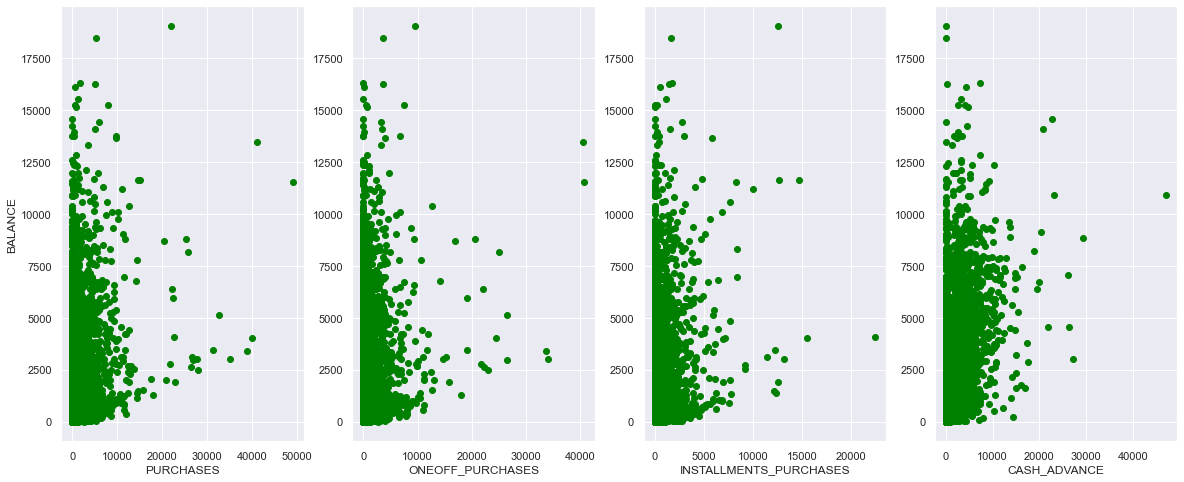

In [63]:
cols   = dataset.columns
fig , ax = plt.subplots(1,4, figsize = (20,8))
ax0, ax1, ax2, ax3 = ax.flatten() 

for i in range(0,4):
    
    Z   = dataset[cols[i+2]]
    K   = dataset[cols[0]]
    ax[i].plot(Z, K, marker = 'o', linestyle = "None",color = "green")
    ax[i].set_xlabel(cols[i+2])
    ax[0].set_ylabel(cols[0])

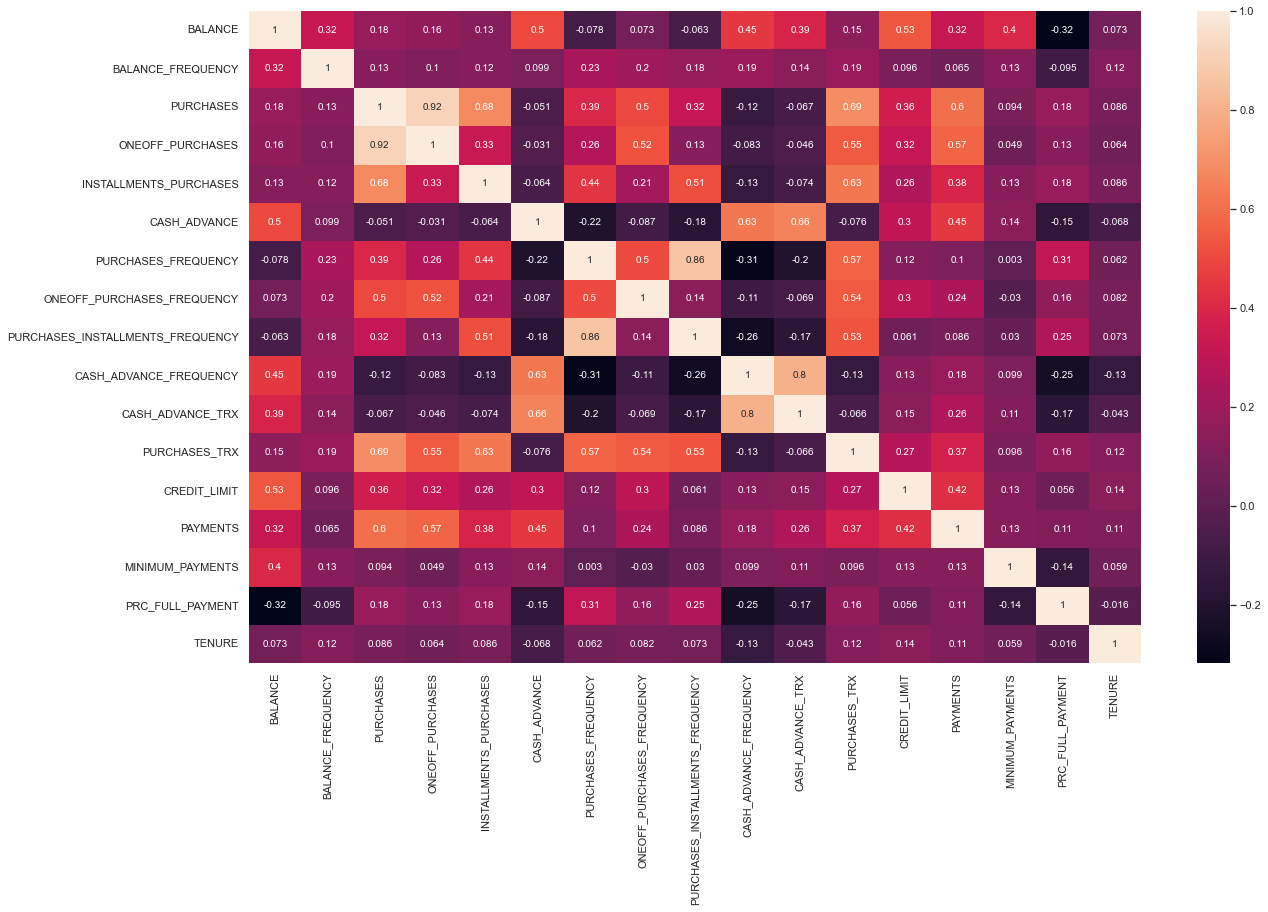

In [64]:
plt.figure(figsize=(20,12))
corr_df = dataset.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [65]:
#dataset = dataset.fillna( dataset.median() )
#X=dataset.iloc[:,0:2]
#X=dataset.iloc[:,3:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
X.shape

(8636, 17)

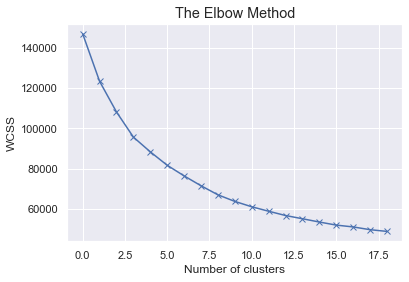

In [67]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(wcss,'bx-')
#marker='o',linestyle='--'
plt.style.use('ggplot')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
    

In [68]:
kmeans = KMeans(n_clusters=8,init="k-means++",random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_x,columns=['pca1','pca2'])


In [70]:
pca_df.sample(5)

,pca1,pca2
5597,0.052270,-2.193404
7924,-2.012648,1.670912
7771,-1.509973,-0.052414
1516,-0.637219,-2.030862
1494,3.124465,-0.877448


In [71]:
cluster_df = pd.concat([dataset,pd.DataFrame({'cluster':labels})], axis = 1)


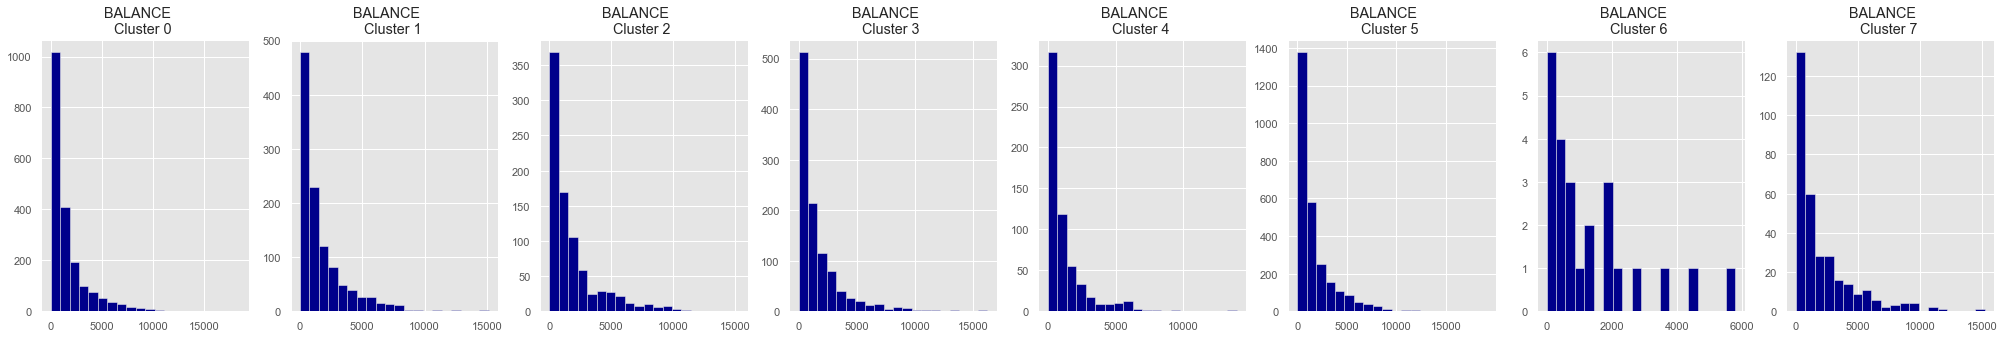

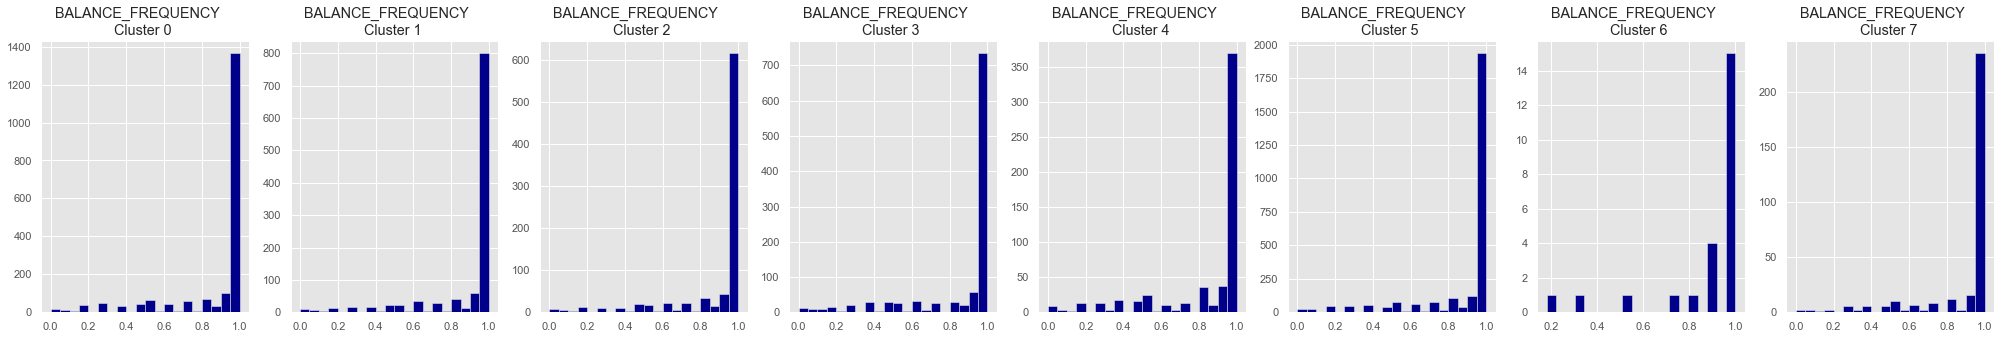

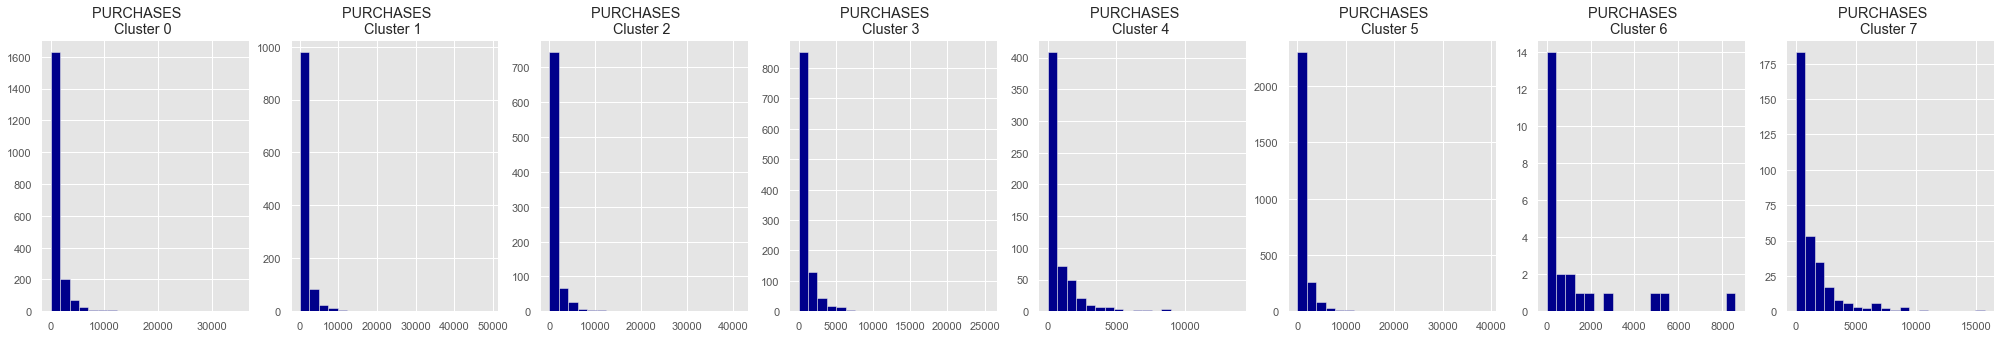

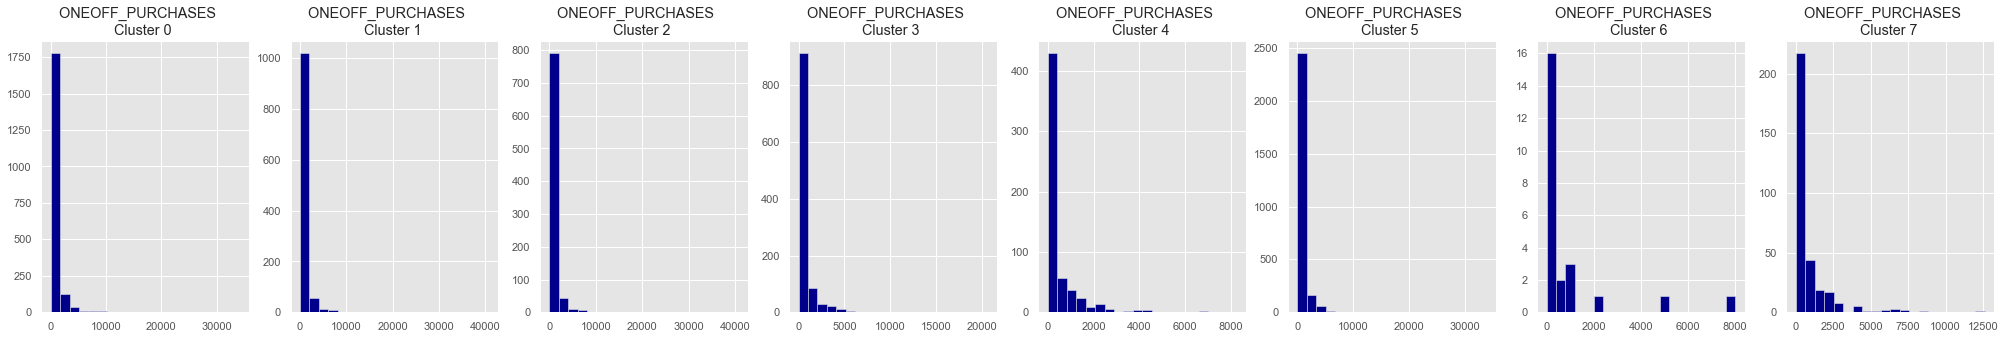

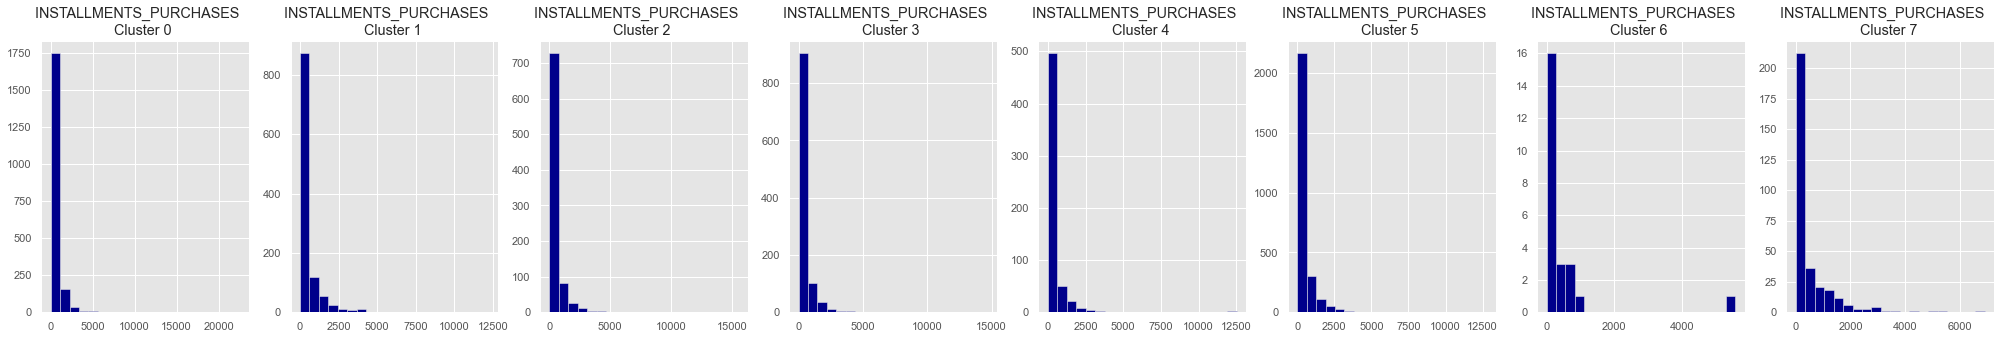

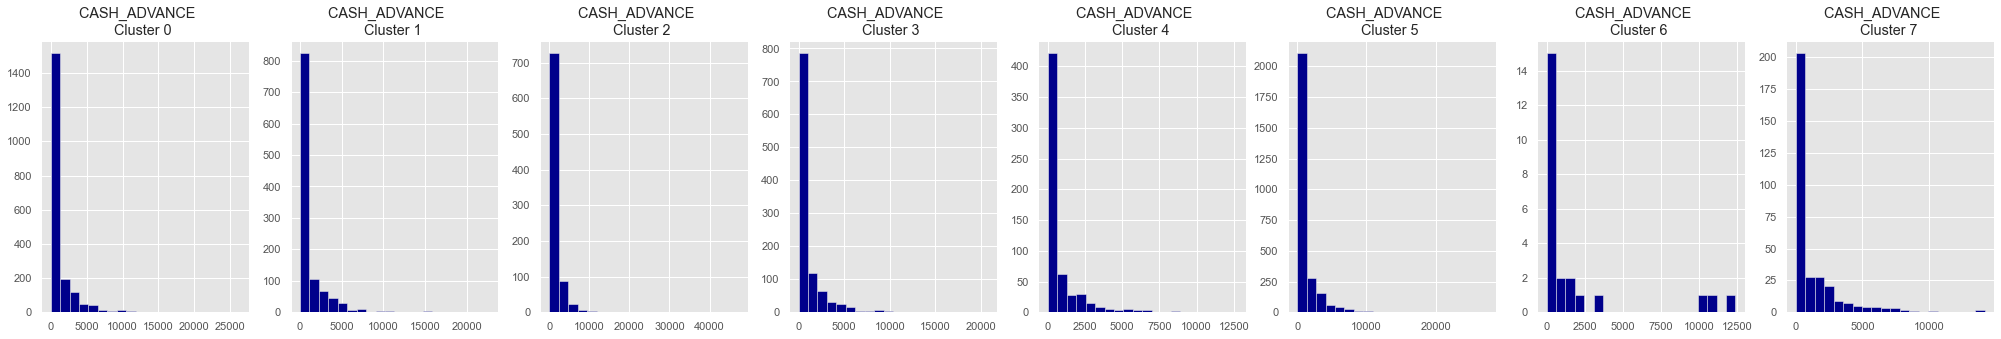

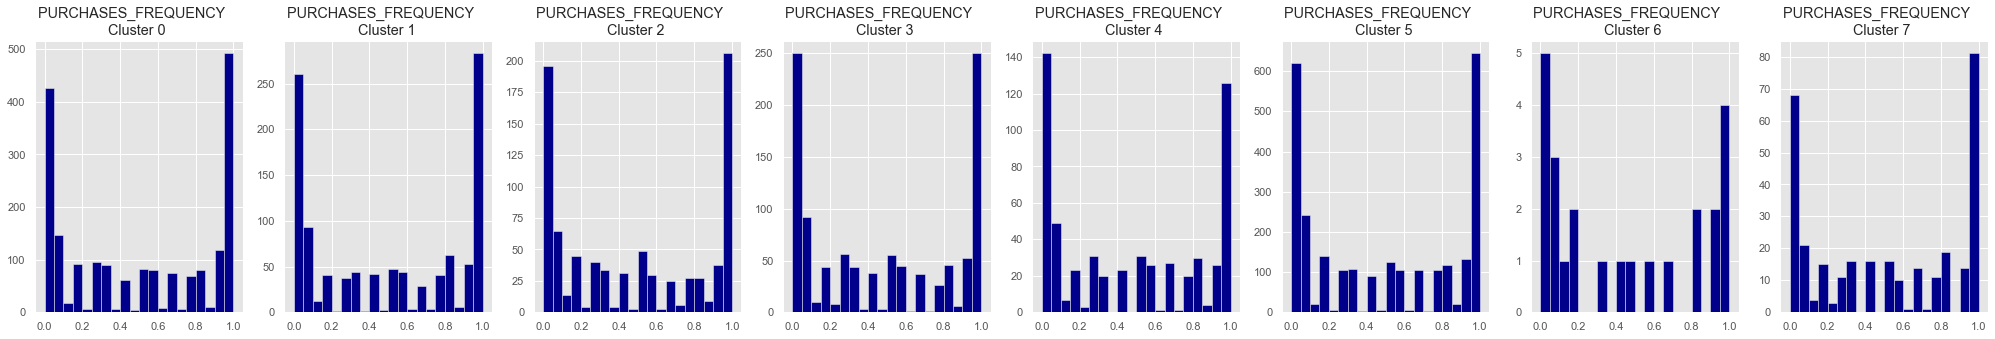

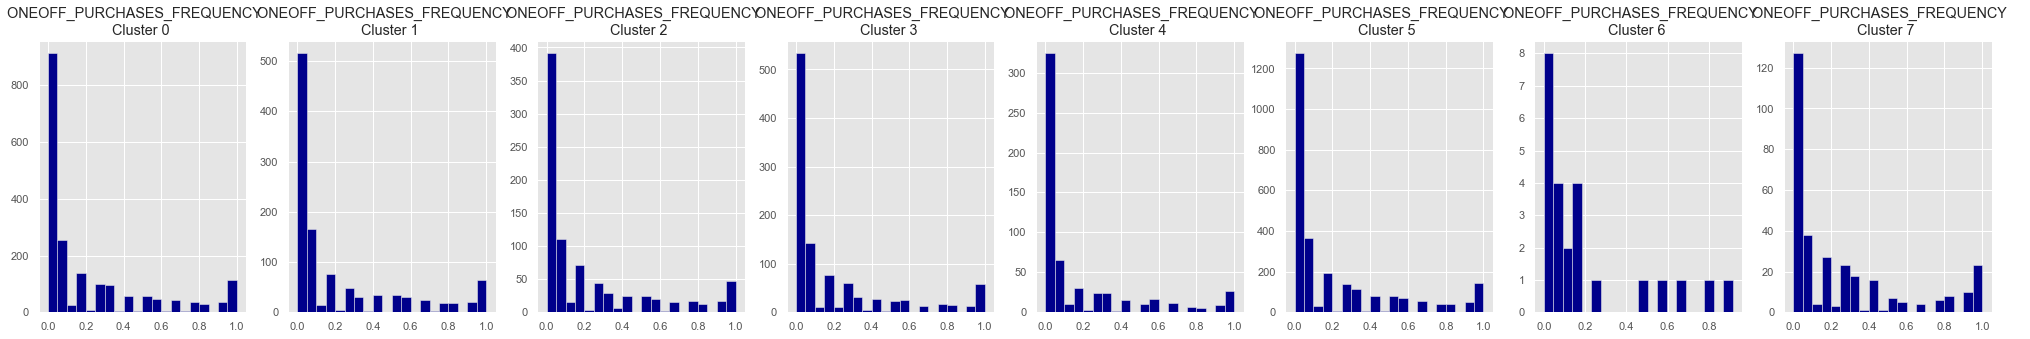

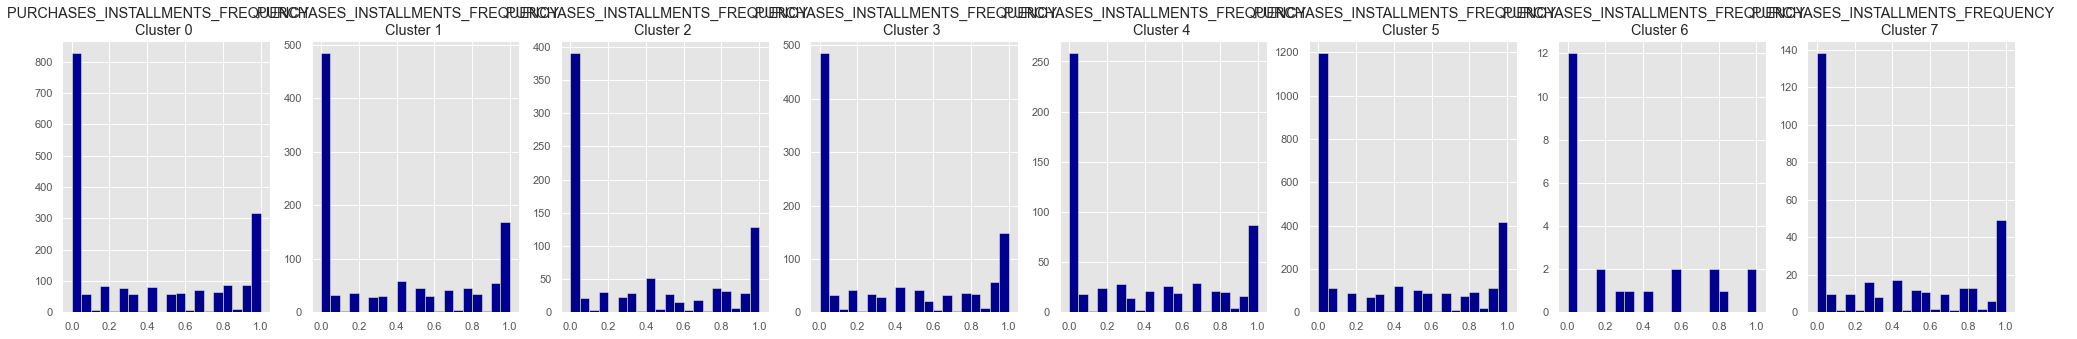

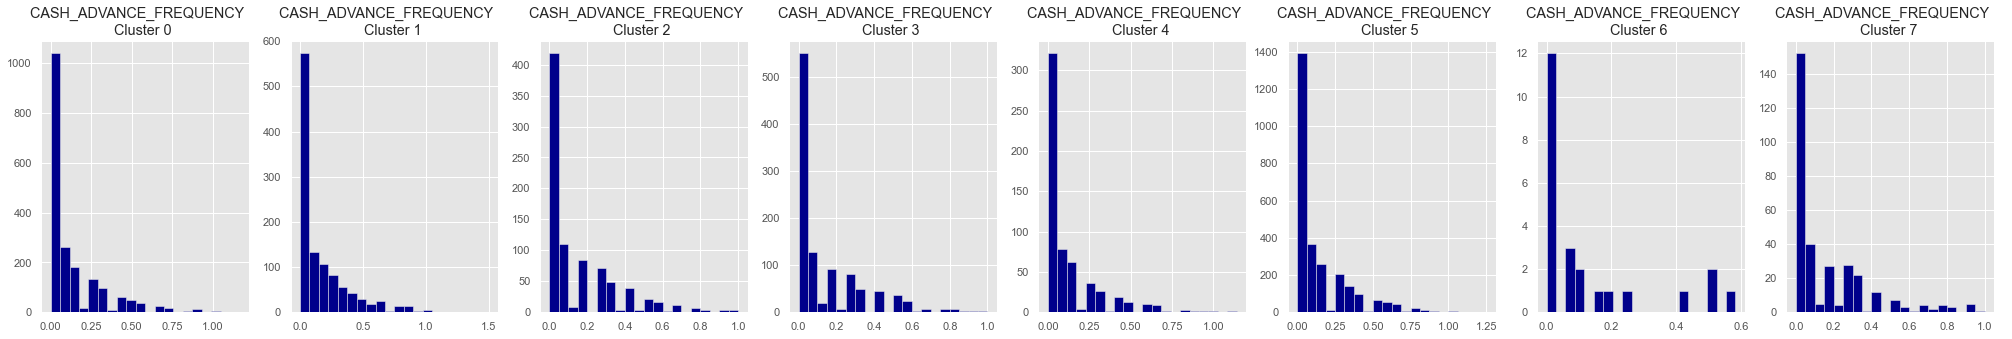

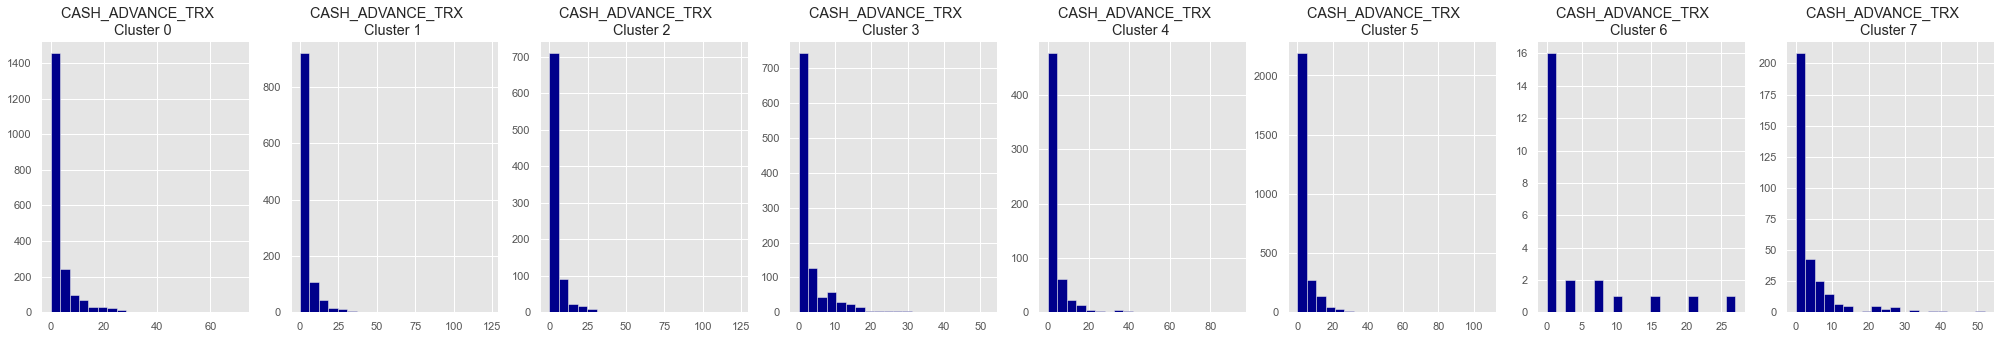

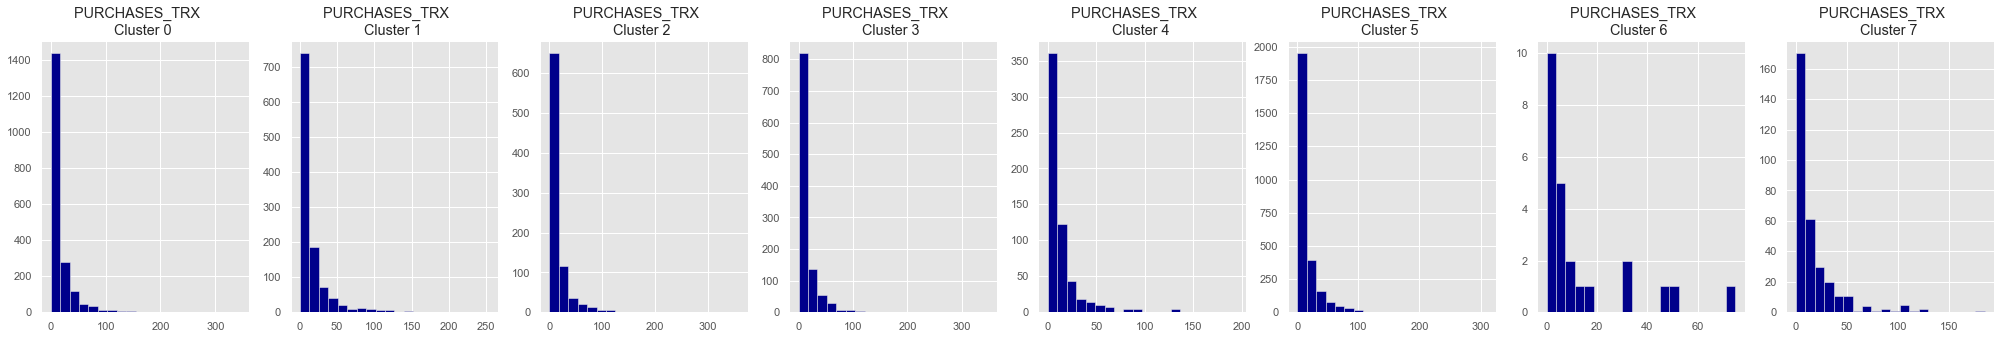

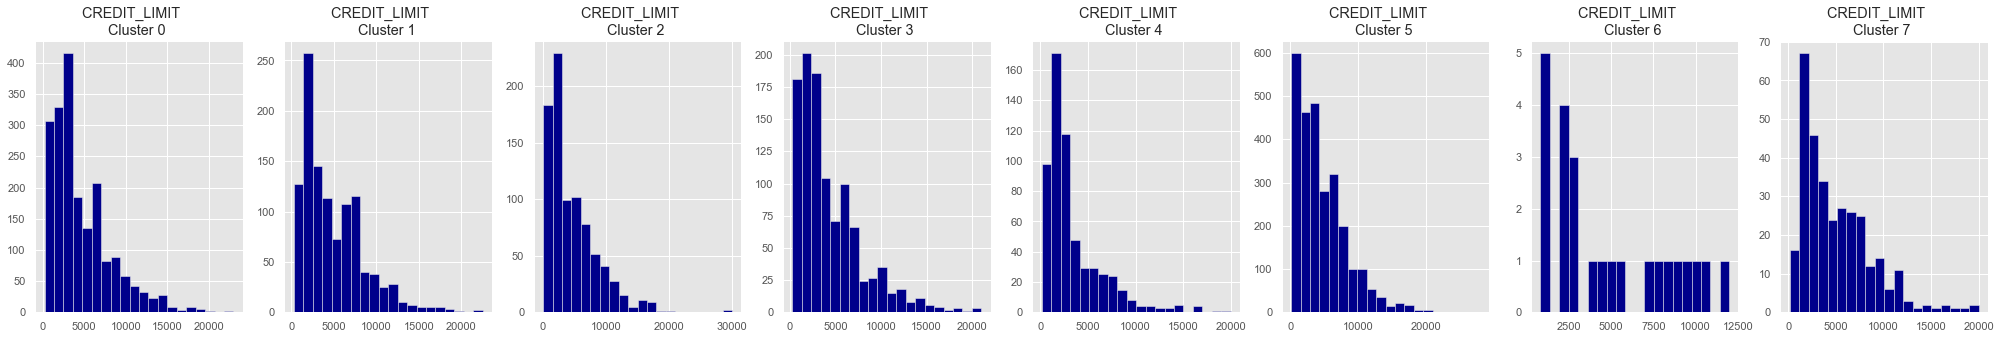

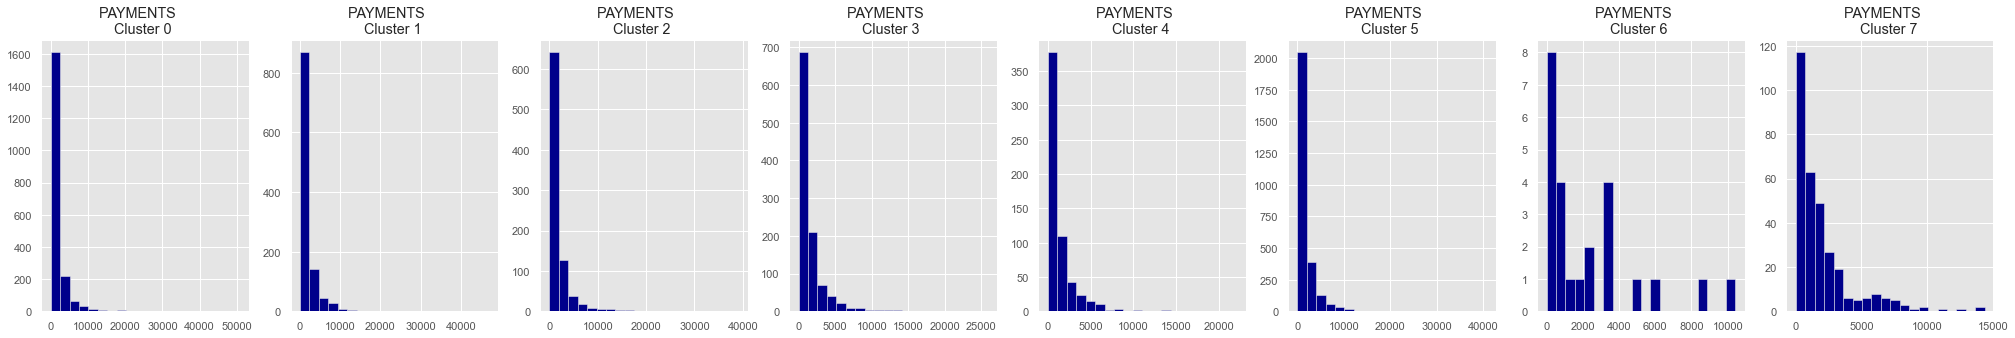

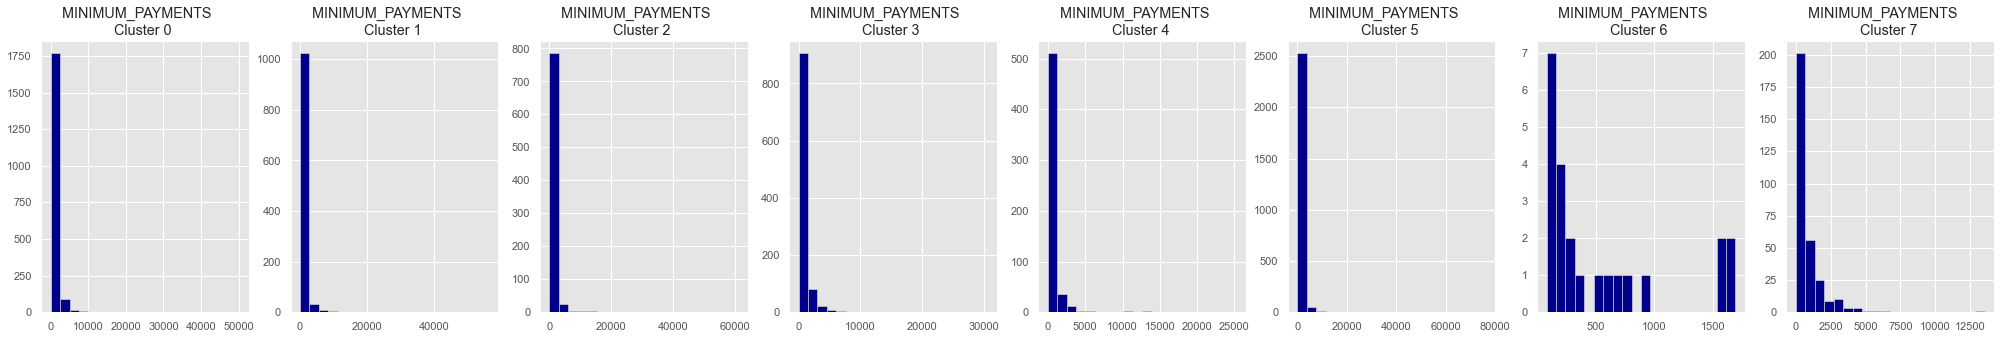

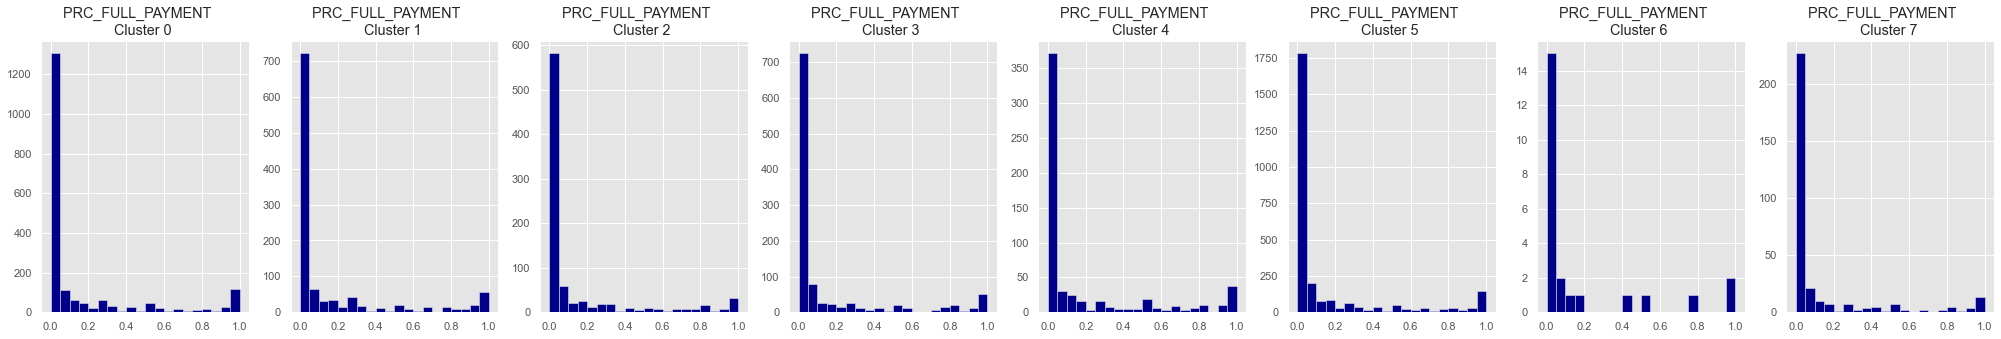

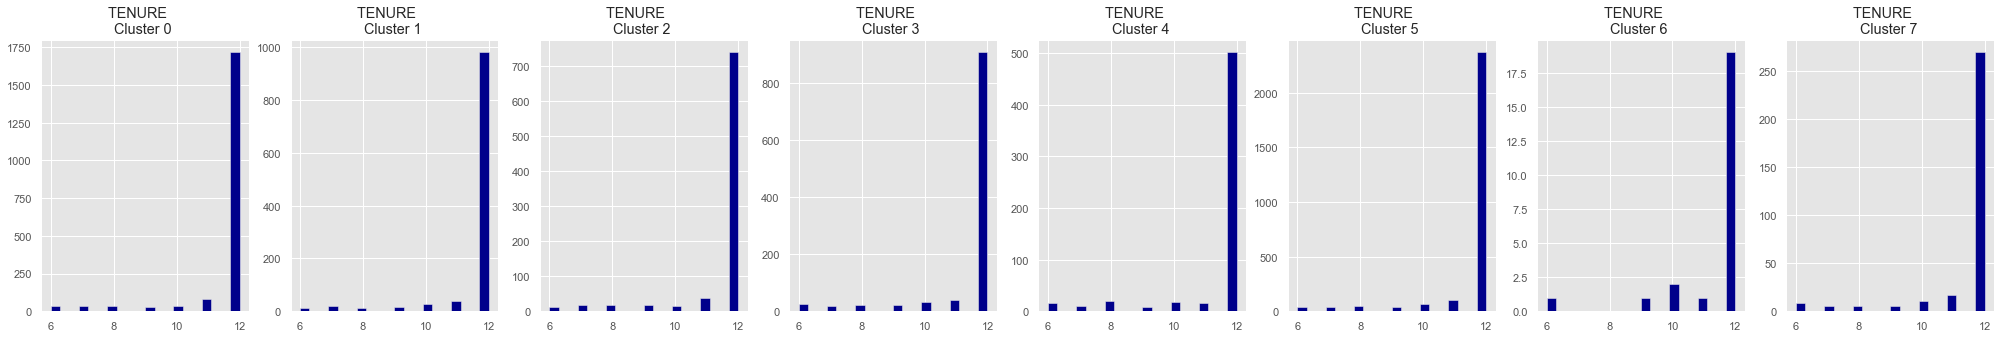

In [85]:
for i in dataset.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = cluster_df[cluster_df['cluster'] == j]
    cluster[i].hist(bins = 20,color = "darkblue")
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [73]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.696396,-1.122584,5
1,-1.215674,2.435622,2
2,0.935860,-0.385206,1
3,-1.614638,-0.724585,5
4,0.223705,-0.783614,0


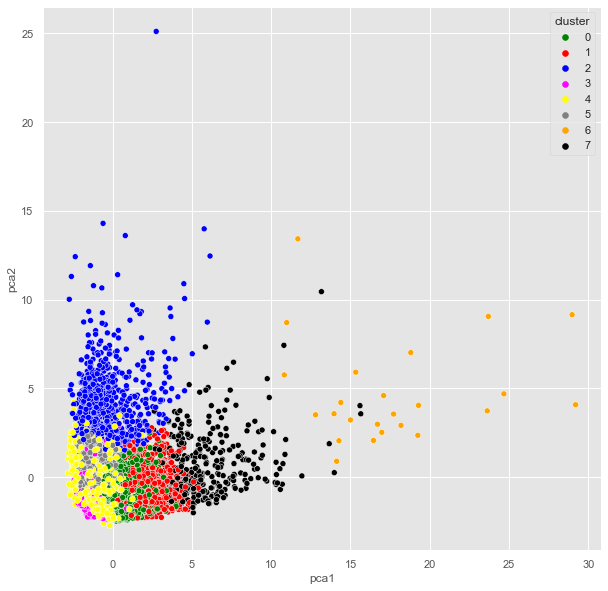

In [79]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['green','red','blue','magenta','yellow','gray','orange', 'black'])
plt.show()

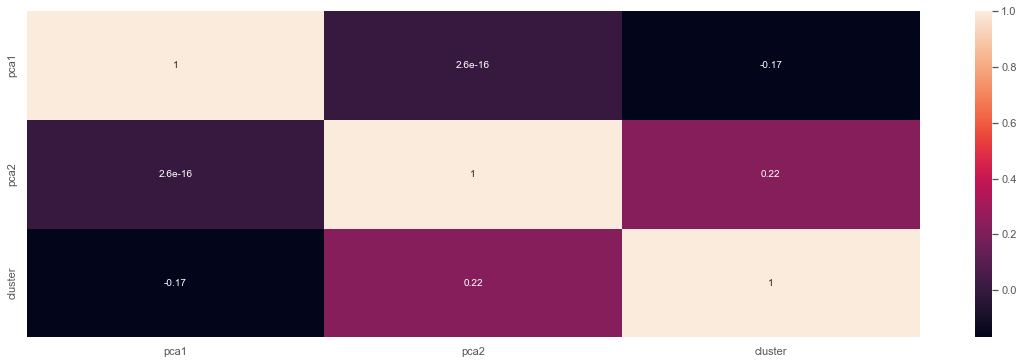

In [81]:
plt.figure(figsize=(20,6))
corr_df = pca_df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()